In [15]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import os


from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv1D, Lambda, MaxPooling1D, Reshape, BatchNormalization, Flatten, UpSampling1D, Dense, AveragePooling1D
from datetime import datetime
from tensorflow.keras import regularizers
from keras import backend as K


from matplotlib.widgets import Slider, Button, RadioButtons




import sys

print(os.getcwd())
sys.path.insert(0, '..')

from training.datapipe import Datapipe
from training.callbacks import DrawImageCallback
from training.model import createVAEModel



c:\Users\z004hkut\projects\20_tda\neural-airfoil-generator\inference


In [7]:

# The parameters of the config file
ih, iw = 256, 4
latent_dim = 2


# Load model and weights
model, encoder, decoder = createVAEModel(ih,iw,latent_dim)
model.load_weights("../weightsTrained/weights_cpk.h5")


In [42]:
%matplotlib inline
from IPython.display import clear_output



@widgets.interact(z1=(-7,7,0.02), z2=(-7,7,0.02))
def foo(z1,z2):
    """
    Print the current widget value in short sentence
    """
    clear_output(wait=True)

    x = np.asarray([[z1,z2]])

    geoms = decoder(x)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    line1, = ax.plot(geoms[0,:,0], geoms[0,:,1]/5, 'b-') # Returns a tuple of line objects, thus the comma
    line2, = ax.plot(geoms[0,:,2], geoms[0,:,3]/5, 'r-') # Returns a tuple of line objects, thus the comma

    plt.axis("equal")
    #plt.axis([0.05,-0.05,-0.01,0.01])

    plt.grid(True)
    plt.xlabel('axis x')
    plt.ylabel('axis y')
    plt.show()
    


interactive(children=(FloatSlider(value=0.0, description='z1', max=7.0, min=-7.0, step=0.02), FloatSlider(valu…

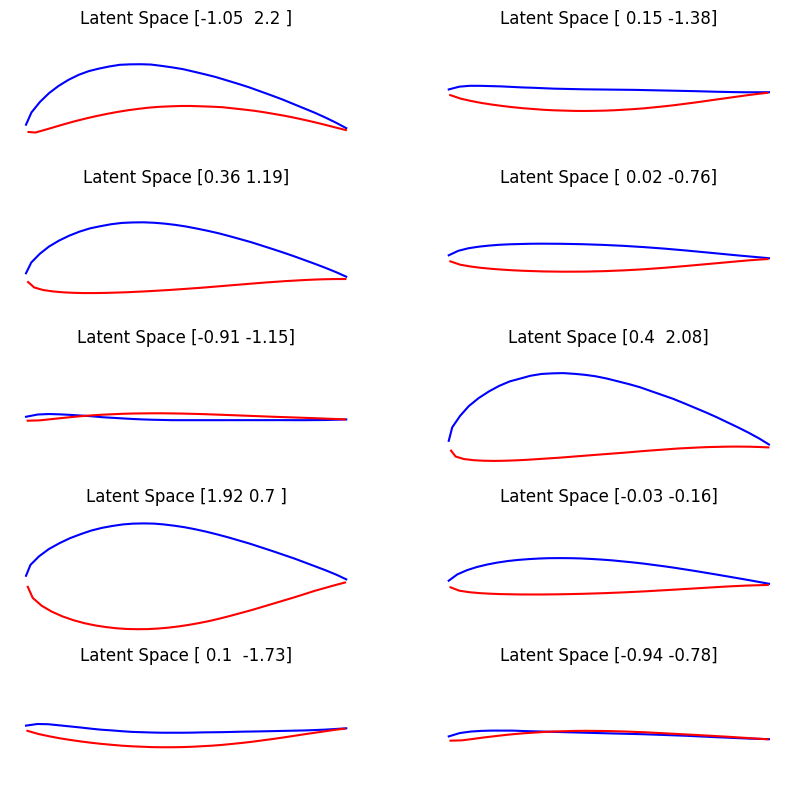

In [41]:


x = np.random.normal(size=(10,2))

geoms = decoder(x)

w=2
h=5

fig, axs = plt.subplots(h, w, figsize=(10,10))


for idx in range(geoms.shape[0]):
    j,i = idx%w, idx//w
    #axs[i,j].title(f"Latent Space {np.around(x[idx,:],2)}")
    axs[i,j].plot(geoms[idx,:,0],  geoms[idx,:,1]/5,'b-')
    axs[i,j].plot(geoms[idx,:,2], -geoms[idx,:,3]/5,'r-')
    axs[i,j].axis("equal")
    axs[i,j].axis('off')
    axs[i,j].title.set_text(f"Latent Space {np.around(x[idx,:],2)}")

plt.show()

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


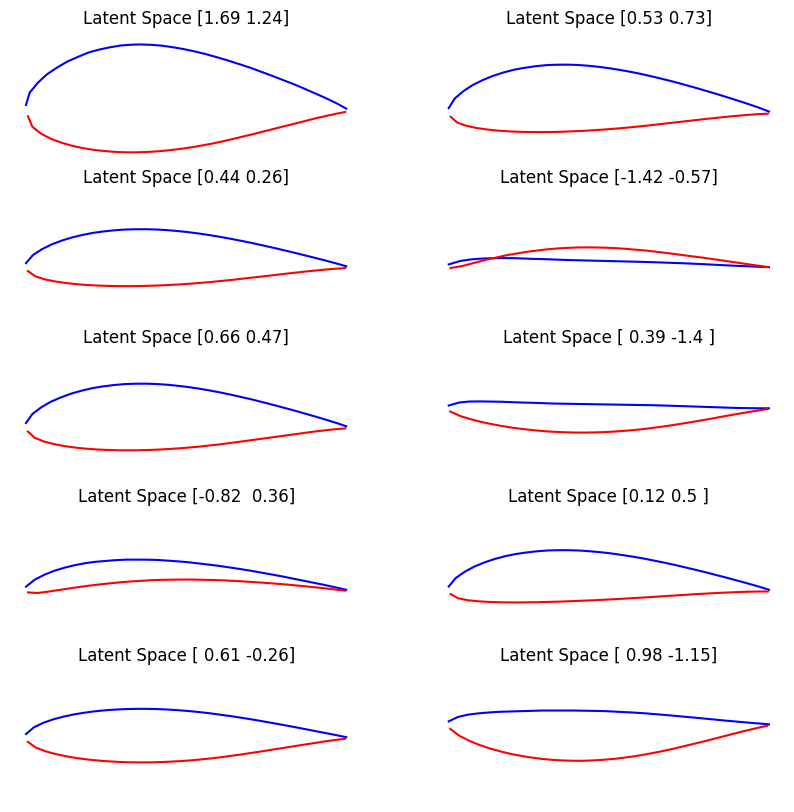